# Final Notebook

The "War on Drugs", as it is commonly known, has been a topic of discussion for some time now. Our struggle to decrease drug use is a topic of great debate and concern, as thousands die from drug overdoses a year, in the US alone.

Many efforts on the Data Science front have been taken to maximize precision and understanding of the prevalence of drugs in the US, such as the [Substance Abuse and Mental Health Services Administration](https://www.samhsa.gov/). One such effort, [Monitoring the Future](http://www.monitoringthefuture.org/links.html) (MTF), has been collecting data for the past couple of decades with the purpose of studying and providing more precise and effective drug intervention for American Youth.

### The Data

This particular [dataset](https://www.icpsr.umich.edu/web/NAHDAP/studies/6716#) from MTF contains demographic and drug use information on approximately **360,000** 12th graders from various schools across the United States. The core data from

## Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
data = pd.read_csv('data/modeling_data/mtf.csv')

In [4]:
data.head()

,yr_adminst,sampling_weight,region,msa,smsa,siblings,evr_smoked_cig,cig_month_freq,evr_drink,alcohol_lifetime_freq,...,hgh_yr_freq,pwd_alc_yr_freq,hookah_month_freq,evr_vape,vape_marj_lifetime_freq,vape_marj_yr_freq,vape_marj_month_freq,vape_flav_lifetime_freq,vape_flav_yr_freq,vape_flav_month_freq
0,1995,0.6,Midwest,1,1,1,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,1995,0.6,West,0,1,2,Regularly Now,2+ Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,1995,0.9,Midwest,0,1,1,Regularly Now,2 Packs,Unknown,40+,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,1995,0.6,South,0,0,3+,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,1995,0.9,Midwest,1,1,None,Never,None,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


<AxesSubplot:>

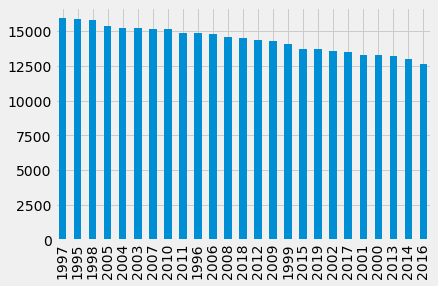

In [9]:
data.yr_adminst.value_counts().plot.bar()

In [ ]:
data..value_counts().plot.bar()

In [35]:
data.has_siblings.value_counts()

Yes        222491
No         108287
Unknown     29032
Name: has_siblings, dtype: int64

<AxesSubplot:>

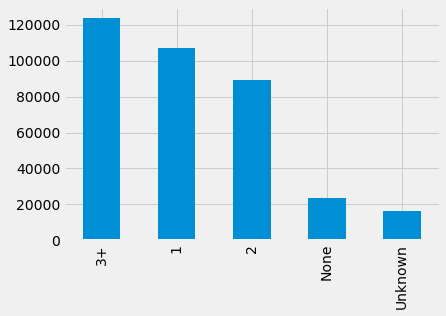

In [10]:
data.siblings.value_counts().plot.bar()

<AxesSubplot:>

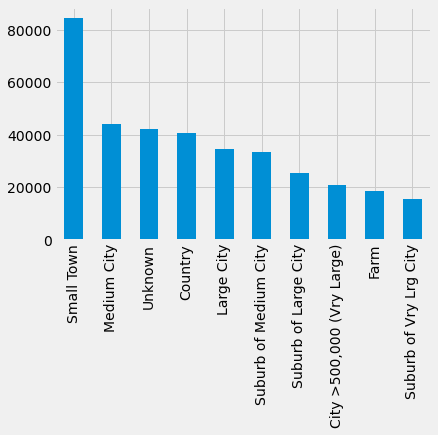

In [11]:
data.area_type.value_counts().plot.bar()

<AxesSubplot:>

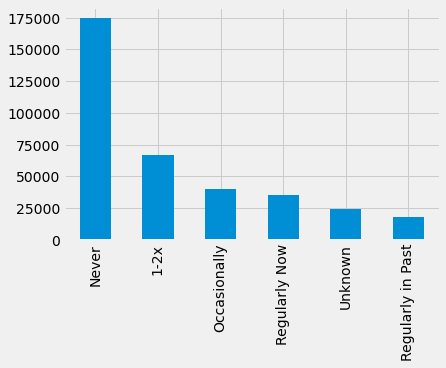

In [12]:
data.evr_smoked_cig.value_counts().plot.bar()

<AxesSubplot:>

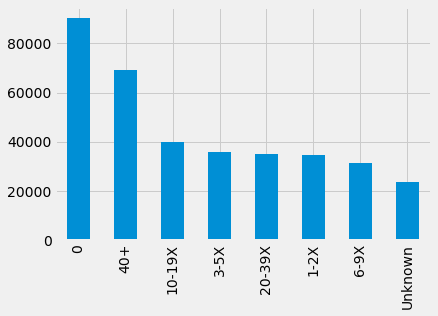

In [14]:
data.alcohol_lifetime_freq.value_counts().plot.bar()

([<matplotlib.axis.XTick at 0x7ff14c09c2b0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

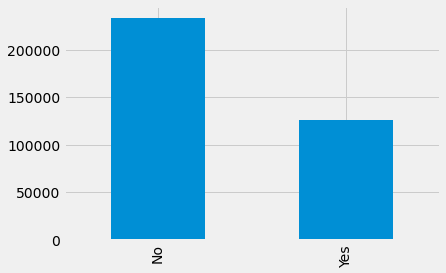

In [33]:
data.msa.value_counts().plot.bar()
plt.xticks([0,1], ['No', 'Yes'])

<AxesSubplot:>

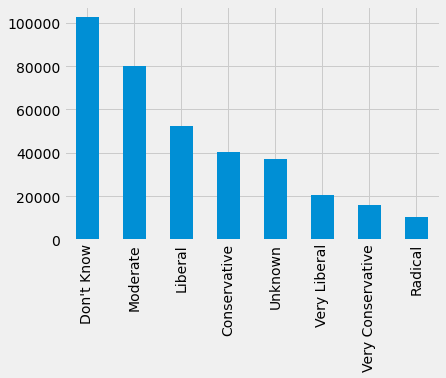

In [28]:
data.political_value_type.value_counts().plot.bar()

<AxesSubplot:>

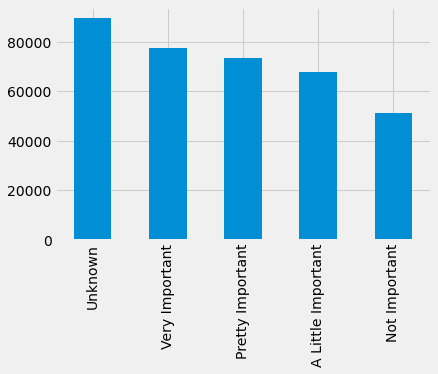

In [27]:
data.relig_importance.value_counts().plot.bar()

<AxesSubplot:>

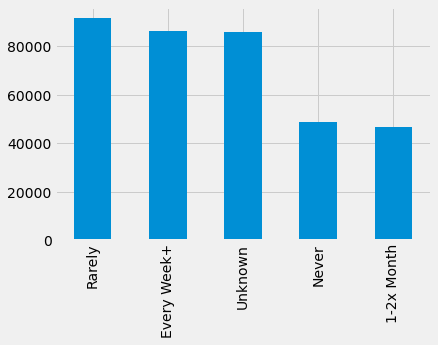

In [26]:
data.relig_attd.value_counts().plot.bar()

<AxesSubplot:>

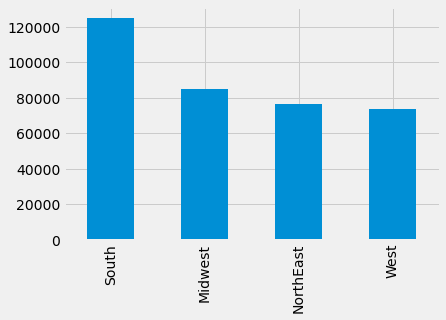

In [24]:
data.region.value_counts().plot.bar()

<AxesSubplot:>

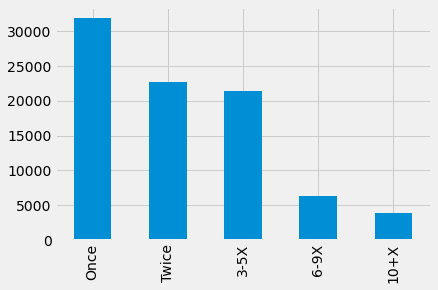

In [22]:
data.alcohol_2weeks.value_counts().iloc[2:].plot.bar()

<AxesSubplot:>

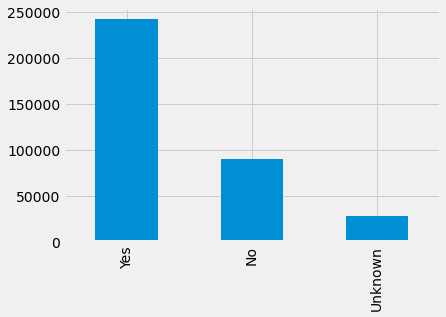

In [20]:
data.has_father.value_counts().plot.bar()

<AxesSubplot:>

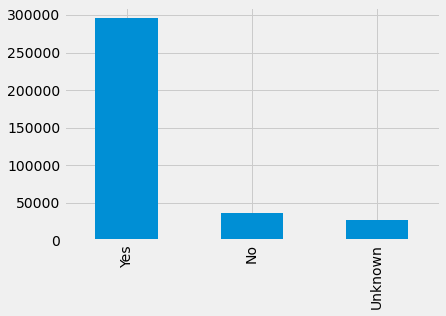

In [17]:
data.has_mother.value_counts().plot.bar()

<AxesSubplot:>

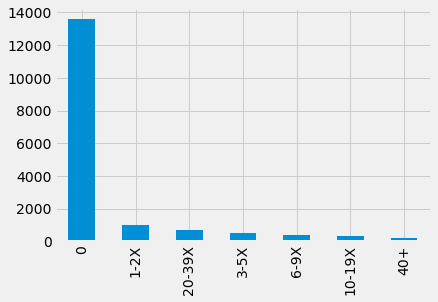

In [16]:
data.vape_marj_yr_freq.value_counts().iloc[1:].plot.bar()

<AxesSubplot:>

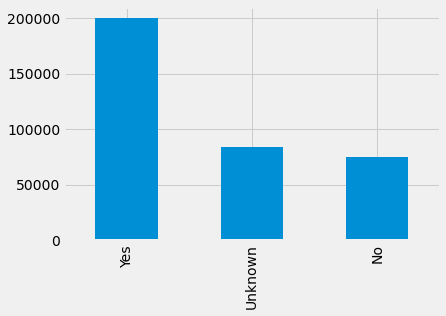

In [13]:
data.evr_drink.value_counts().plot.bar()

<AxesSubplot:>

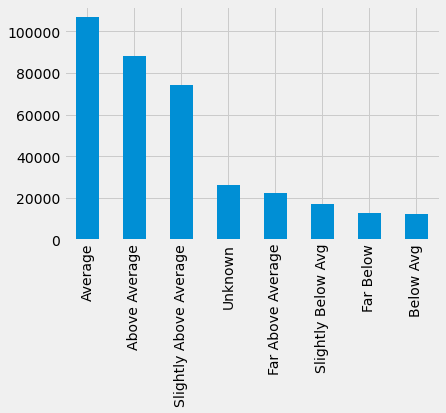

In [10]:
data.academic_self_rating.value_counts().plot.bar()

<AxesSubplot:>

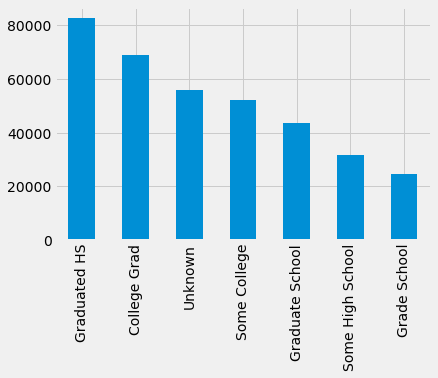

In [9]:
data.father_educ_lvl.value_counts().plot.bar()

## Modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())

yr_adminst
1997    15963
1995    15876
1998    15780
2005    15378
2004    15222
2003    15200
2007    15132
2010    15127
2011    14855
1996    14823
2006    14814
2008    14577
2018    14502
2012    14343
2009    14268
1999    14056
2015    13730
2019    13713
2002    13544
2017    13522
2001    13304
2000    13286
2013    13180
2014    13015
2016    12600
Name: yr_adminst, dtype: int64
sampling_weight
0.900000    5372
0.600000    4483
1.200000    2741
1.800000    1825
0.300000    1001
            ... 
0.960285       1
0.737847       1
0.872941       1
3.552315       1
0.567294       1
Name: sampling_weight, Length: 210331, dtype: int64
region
South        124943
Midwest       85040
NorthEast     76260
West          73567
Name: region, dtype: int64
msa
0    233854
1    125956
Name: msa, dtype: int64
smsa
1    289153
0     70657
Name: smsa, dtype: int64
siblings
3+         123536
1          106867
2           89413
None        23451
Unknown     16543
Name: siblings, dtype: int64
evr_s

0          183765
Unknown    167594
1-2X         4503
3-5X         1640
6-9X          941
10-19X        649
40+           405
20-39X        313
Name: inhal_yr_freq, dtype: int64
inhal_month_freq
0          188983
Unknown    167659
1-2X         1846
3-5X          576
6-9X          304
10-19X        191
40+           170
20-39X         81
Name: inhal_month_freq, dtype: int64
age
18+        168532
< 18       137913
Unknown     53365
Name: age, dtype: int64
sex
Female     166983
Male       159871
Unknown     32956
Name: sex, dtype: int64
race_bwh
White       200615
Unknown      82670
Black        45746
Hispanic     30779
Name: race_bwh, dtype: int64
area_type
Small Town                   84484
Medium City                  44126
Unknown                      42189
Country                      40570
Large City                   34688
Suburb of Medium City        33274
Suburb of Large City         25324
City >500,000 (Vry Large)    20938
Farm                         18503
Suburb of Vry Lrg Cit

2          82745
3          71442
4-5        47639
1          45534
<1         44445
Unknown    44215
6-7        23790
Name: rec_time, dtype: int64
date_freq
Never         99963
1x Month      52515
2-3x Week     47383
2-3x Month    45709
Unknown       43783
1x Week       43222
3x Week+      27235
Name: date_freq, dtype: int64
drive_freq
0          73915
11-50      71528
51-100     66549
101-200    47901
Unknown    39103
200+       33298
1-10       27516
Name: drive_freq, dtype: int64
12mo_r_tcktd
0          214493
1           56236
Unknown     41796
2           21634
3           14194
4+          11457
Name: 12mo_r_tcktd, dtype: int64
tckts_aft_drnk
Unknown    255256
0           68342
1           16662
3+          12629
2            6921
Name: tckts_aft_drnk, dtype: int64
tckts_aft_marj
Unknown    256390
0           68884
1           15179
3+          14689
2            4668
Name: tckts_aft_marj, dtype: int64
tckts_aft_otdg
Unknown    252830
0           91426
1            7176
3+      

Unknown    344665
0           15000
1-2X           46
40+            32
3-5X           28
6-9X           25
10-19X          7
20-39X          7
Name: pcp_yr_freq, dtype: int64
pcp_month_freq
Unknown    342138
0           17231
1-2X          191
3-5X           71
6-9X           58
40+            55
10-19X         51
20-39X         15
Name: pcp_month_freq, dtype: int64
mdma_lifetime_freq
Unknown    279490
0           75728
1-2X         2493
3-5X          872
6-9X          477
10-19X        326
40+           260
20-39X        164
Name: mdma_lifetime_freq, dtype: int64
mdma_yr_freq
Unknown    279497
0           77550
1-2X         1657
3-5X          502
6-9X          250
10-19X        166
40+           122
20-39X         66
Name: mdma_yr_freq, dtype: int64
mdma_month_freq
Unknown    270500
0           88145
1-2X          723
3-5X          175
6-9X           94
40+            91
10-19X         59
20-39X         23
Name: mdma_month_freq, dtype: int64
crack_lifetime_freq
0          191161
Unkn

Unknown    304964
0           53816
1-2X          361
3-5X          223
40+           146
6-9X          138
10-19X        102
20-39X         60
Name: andro_yr_freq, dtype: int64
creatine_yr_freq
Unknown    298879
0           55904
1-2X         1251
40+          1120
3-5X          790
10-19X        697
6-9X          591
20-39X        578
Name: creatine_yr_freq, dtype: int64
coughmed_yr_freq
Unknown    305683
0           51428
1-2X         1230
3-5X          700
6-9X          330
10-19X        192
40+           151
20-39X         96
Name: coughmed_yr_freq, dtype: int64
adderall_yr_freq
Unknown    319262
0           38227
1-2X         1129
3-5X          511
6-9X          261
10-19X        177
40+           160
20-39X         83
Name: adderall_yr_freq, dtype: int64
salvia_yr_freq
Unknown    326019
0           32584
1-2X          665
3-5X          217
6-9X          112
40+           105
10-19X         74
20-39X         34
Name: salvia_yr_freq, dtype: int64
provigil_yr_freq
Unknown    351523

In [7]:
conds = [(data['weed_hash_lifetime_freq']=='0'), ((data['weed_hash_lifetime_freq']!='0')&(data['weed_hash_lifetime_freq']!='Unknown')),
        (data['weed_hash_lifetime_freq']=='Unknown')]

labels = [0, 1, 'Unknown']

data['binary_weed'] = np.select(conds, labels)

<AxesSubplot:>

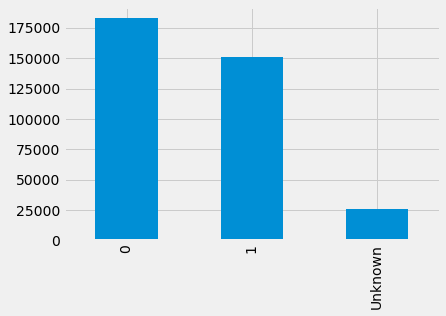

In [8]:
# Class distribution
data.binary_weed.value_counts().plot.bar()

In [14]:
feature_mask = ['yr_adminst', 'sampling_weight', 'msa', 'siblings', 'evr_drink', 'has_father', 'father_educ_lvl',
               'mother_educ_lvl', 'mother_employed', 'academic_self_rating', 'relig_importance', 'binary_weed']

model_data_base = data[feature_mask]

In [17]:
len(model_data)

359810

In [13]:
model_data.head()

,yr_adminst,sampling_weight,msa,siblings,evr_drink,has_father,father_educ_lvl,mother_educ_lvl,mother_employed,academic_self_rating,relig_importance,binary_weed
0,1995,0.6,1,1,Unknown,No,Graduated HS,College Grad,Yes/Nearly All,Average,A Little Important,0
1,1995,0.6,0,2,Unknown,No,Some High School,Graduated HS,Yes/Some,Far Above Average,Not Important,1
2,1995,0.9,0,1,Unknown,Yes,Some College,Graduated HS,Yes/Nearly All,Average,Not Important,1
3,1995,0.6,0,3+,Unknown,Yes,Graduated HS,Graduated HS,Yes/Some,Average,Pretty Important,0
4,1995,0.9,1,None,Unknown,Yes,College Grad,Graduate School,Yes/Most,Average,Very Important,0


In [22]:
ind_to_drop = []

for col in model_data_base.columns[2:]:
    
    for i in range(len(model_data_base[col])):
        if model_data_base[col].iloc[i] == 'Unknown':
            ind_to_drop.append(i)

In [24]:
model_data_base.drop(labels=ind_to_drop, inplace=True)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
model_data_base.binary_weed.value_counts()

0    99780
1    83471
Name: binary_weed, dtype: int64

In [25]:
model_data_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183251 entries, 2660 to 359808
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   yr_adminst            183251 non-null  int64  
 1   sampling_weight       183251 non-null  float64
 2   msa                   183251 non-null  int64  
 3   siblings              183251 non-null  object 
 4   evr_drink             183251 non-null  object 
 5   has_father            183251 non-null  object 
 6   father_educ_lvl       183251 non-null  object 
 7   mother_educ_lvl       183251 non-null  object 
 8   mother_employed       183251 non-null  object 
 9   academic_self_rating  183251 non-null  object 
 10  relig_importance      183251 non-null  object 
 11  binary_weed           183251 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 18.2+ MB


In [31]:
X = model_data_base.drop(labels='binary_weed', axis=1)
y = model_data_base.binary_weed

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
ohe = OneHotEncoder(sparse=False)

X_tr_cat = X_train.drop(labels='sampling_weight', axis=1)
X_te_cat = X_test.drop(labels='sampling_weight', axis=1)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_te_cat), columns=ohe.get_feature_names())

In [38]:
ss = StandardScaler()

X_tr_num = np.array(X_train.sampling_weight).reshape(-1,1)
X_te_num = np.array(X_test.sampling_weight).reshape(-1,1)

X_tr_sc = pd.DataFrame(ss.fit_transform(X_tr_num), columns=['sampling_weight'])
X_te_sc = pd.DataFrame(ss.transform(X_te_num), columns=['sampling_weight'])

In [40]:
X_train_pp = pd.concat([X_tr_ohe, X_tr_sc], axis=1)
X_te_pp = pd.concat([X_te_ohe, X_te_sc], axis=1)

In [42]:
y_train.value_counts()

0    74910
1    62528
Name: binary_weed, dtype: int64

In [43]:
len(X_train_pp)==len(y_train)

True

In [45]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train_pp, y_train)

LogisticRegression(max_iter=10000)

In [49]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score

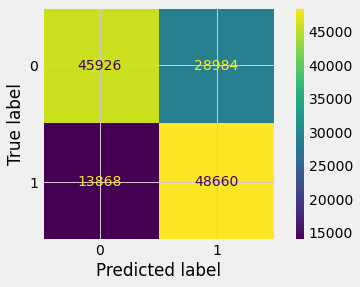

In [50]:
plot_confusion_matrix(lr, X_train_pp, y_train)

In [51]:
y_pred_tr = lr.predict(X_train_pp)

In [52]:
accuracy_score(y_train, y_pred_tr)

0.6882085012878534

In [59]:
recall_score(y_train, y_pred_tr, pos_label='1')

0.778211361310133